# Summary of topographic dependence

***

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
plt.rcParams['font.size'] = 14

## Continuous stratification model

Governing equations below a surface Ekman layer

\begin{align}
-fv & = -\frac{1}{\rho_0}\frac{\partial p}{\partial x} \\
\frac{\partial v}{\partial t} + fu & = 0 \\
\frac{\partial p}{\partial z} + \rho g & = 0 \\
\frac{\partial u}{\partial x} + \frac{\partial w}{\partial z} & = 0 \\
\frac{\partial\rho}{\partial t} + w\frac{\partial\rho_*}{\partial z} & = 0
\end{align}

Flux boundary condition

$$U = -\frac{\tau}{\rho_0f}$$

Streamfunction solution

$$\psi(x, z) = -\frac{\tau}{\rho_0f\tan^{-1}S}\tan^{-1}\left(\frac{Nz}{fx}\right)$$

Velocities

\begin{align}
u = \frac{\partial\psi}{\partial z} & = -\frac{\tau}{\rho_0N\tan^{-1}S}\left(\frac{x}{z^2 + \left(fx/N\right)^2}\right) \\
w = -\frac{\partial\psi}{\partial x} & = -\frac{\tau}{\rho_0N\tan^{-1}S}\left(\frac{z}{z^2 + \left(fx/N\right)^2}\right)
\end{align}

### Problem

I originally solved for density $\rho$ using

$$\frac{\partial\rho}{\partial t} + w\frac{\partial\rho_*}{\partial z} = 0 \hspace{1cm} \longrightarrow \hspace{1cm} \rho = -\frac{\partial\rho_*}{\partial z}\int wdt$$

$$\rho(x, z, t) = \rho_*\left(1 + \frac{\tau}{\rho_0N\tan^{-1}S}\left(\frac{t}{z^2 + \left(fx/N\right)^2}\right)\right) + \rho_0$$

/home/bmoorema/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  
/home/bmoorema/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in arctan
  


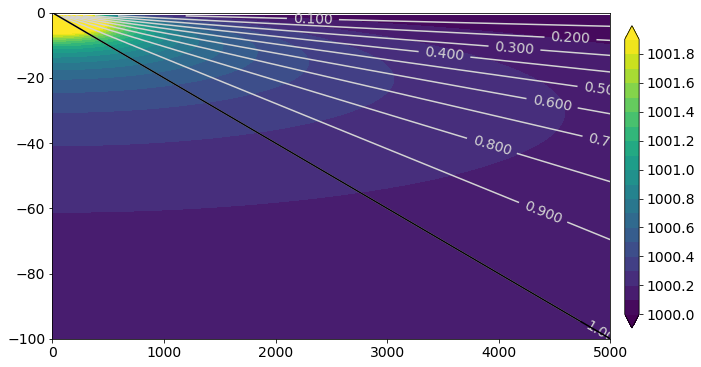

In [24]:
f, g, rho_0, tau, N, alpha, t = 1e-4, 9.81, 1e3, 0.1, 0.015, 0.02, 1e5

xi = np.arange(0, 5e3)
zi = np.arange(-100, 0, 1)
x, z = np.meshgrid(xi, zi)
S = alpha * N / f

psi = -np.arctan(N * z / (f * x)) / np.arctan(S)
rho_star = -rho_0 * N**2 * z / g
rho = rho_star * (tau * t / (rho_0 * N * np.arctan(S)) / (z**2 + (f * x / N)**2)) + rho_0

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_xlim([0, 5e3])
ax.set_ylim([-100, 0])

c = ax.contourf(x, z, rho, levels=np.arange(1000, 1002, 0.1), extend='both')
ax.plot(xi, -alpha * xi, 'k-', zorder=10)
cs = ax.contour(x, z, psi, levels=np.arange(0, 1.1, 0.1), colors='lightgray')
plt.clabel(cs)

cax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
fig.colorbar(c, cax=cax)

### Solution

Need to include full density advection along streamlines

$$\frac{\partial\rho}{\partial t} + u\frac{\partial\rho}{\partial x} + w\frac{\partial\rho}{\partial z} = 0$$

Which can be solved using Method of Characteristics

$$\rho(x, z, t) = \rho_*(z)\left(1 + \frac{2\tau}{\rho_0N\tan^{-1}S}\left(\frac{t}{z^2 + \left(fx/N\right)^2}\right)\right)^{\frac{1}{2}} + \rho_0$$

/home/bmoorema/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  
/home/bmoorema/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in arctan
  


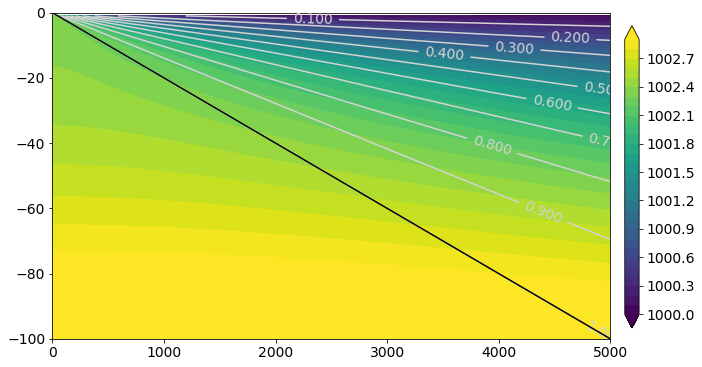

In [25]:
f, g, rho_0, tau, N, alpha, t = 1e-4, 9.81, 1e3, 0.1, 0.015, 0.02, 1e6

xi = np.arange(0, 5e3)
zi = np.arange(-100, 0, 1)
x, z = np.meshgrid(xi, zi)
S = alpha * N / f

psi = -np.arctan(N * z / (f * x)) / np.arctan(S)
rho_star = -rho_0 * N**2 * z / g
rho = rho_star * np.sqrt(1 + 2 * tau * t / (rho_0 * N * np.arctan(S)) / (z**2 + (f * x / N)**2)) + rho_0

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_xlim([0, 5e3])
ax.set_ylim([-100, 0])

c = ax.contourf(x, z, rho, levels=np.arange(1000, 1003, 0.1), extend='both')
ax.plot(xi, -alpha * xi, 'k-', zorder=10)
cs = ax.contour(x, z, psi, levels=np.arange(0, 1.1, 0.1), colors='lightgray')
plt.clabel(cs)

cax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
fig.colorbar(c, cax=cax)